In [1]:
# we start by importing the Python libraries that we will be using:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
plt.style.use('ggplot')


In [2]:
# pass the dataset through Pandas and output it as a dataframe andread the first 5 rows:
df = pd.read_csv('data/kc_house_data.csv')


df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Exploratory Data Analysis

In [3]:
# print out the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
# Generate the dataframe descriptive statistics:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The numerical display for the larger numbers is in scientific format, making it a little tricky to figure out. We can suppress the scientific notation for a clearer output. We then re-run the .describe() method and transpose it for an 
easier display of all njumerical columns.

In [20]:
pd.options.display.float_format = '{:20,.2f}'.format

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,"21,597.00","4,580,474,287.77","2,876,735,715.75","1,000,102.00","2,123,049,175.00","3,904,930,410.00","7,308,900,490.00","9,900,000,190.00"
price,"21,597.00","540,296.57","367,368.14","78,000.00","322,000.00","450,000.00","645,000.00","7,700,000.00"
bedrooms,"21,597.00",3.37,0.93,1.00,3.00,3.00,4.00,33.00
bathrooms,"21,597.00",2.12,0.77,0.50,1.75,2.25,2.50,8.00
sqft_living,"21,597.00","2,080.32",918.11,370.00,"1,430.00","1,910.00","2,550.00","13,540.00"
sqft_lot,"21,597.00","15,099.41","41,412.64",520.00,"5,040.00","7,618.00","10,685.00","1,651,359.00"
floors,"21,597.00",1.49,0.54,1.00,1.00,1.50,2.00,3.50
sqft_above,"21,597.00","1,788.60",827.76,370.00,"1,190.00","1,560.00","2,210.00","9,410.00"
yr_built,"21,597.00","1,971.00",29.38,"1,900.00","1,951.00","1,975.00","1,997.00","2,015.00"
yr_renovated,"17,755.00",83.64,399.95,0.00,0.00,0.00,0.00,"2,015.00"


In [23]:
df[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,"640,000.00",33,1.75,1620,6000,1.00,NO,NONE,...,7 Average,1040,580.0,1947,0.00,98103,47.69,-122.33,1330,4700


In [8]:
# view column labels:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
# Check for missing values in the dataframe:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [14]:
# Inspect the price column to see if there are any major outliers:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,NO,GOOD,...,13 Mansion,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,YES,AVERAGE,...,11 Excellent,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,NO,EXCELLENT,...,13 Mansion,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,NO,NONE,...,13 Mansion,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,NO,EXCELLENT,...,12 Luxury,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,YES,NaN,...,12 Luxury,5000,2390.0,1991,0.0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,YES,EXCELLENT,...,12 Luxury,5990,2020.0,1999,0.0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,YES,EXCELLENT,...,12 Luxury,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,YES,EXCELLENT,...,12 Luxury,6350,290.0,2004,0.0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,NO,NONE,...,12 Luxury,6430,0.0,2001,0.0,98004,47.6208,-122.219,3720,14592


The top 12 most expensive houses in King County, WA with prices ranging from 4 million to 7m US Dollars are major outliers.

The dataframe has has 3 columns with missing data: the 'waterfront', 'view' and 'yr_renovated' columns.

<AxesSubplot:xlabel='long', ylabel='lat'>

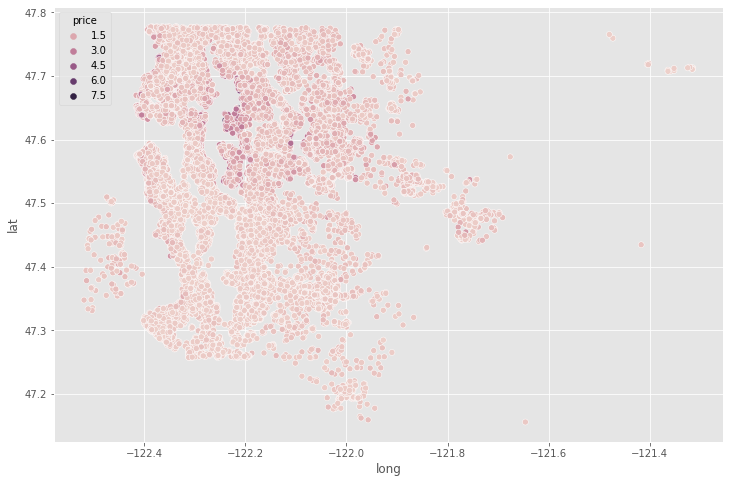

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['long'], y=df['lat'],data=df,hue=df['price'])

/Users/rotimiadejumo/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


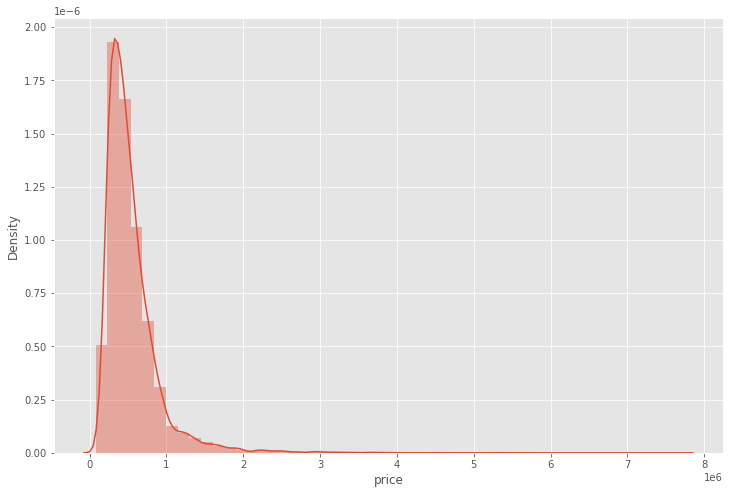

In [48]:
plt.figure(figsize=(12,8))
sns.distplot(df['price']);

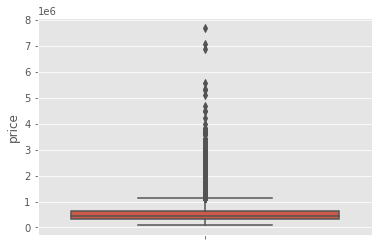

In [54]:
sns.boxplot(y=df['price']);

The boxplot and histplot above are indicators that there are indeed outliers in price terms. The histplot is skewed to the right with the median home price lying somewhere between 400,000 and 500,000 US dollars.

In [10]:
# compute pairwise correlation of numerical columns:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


A number of columns have a fairly high correlation: 'sqft_living':'price', 'sqft_living' - 'bathrooms', 'sqft_above' -'sqft_living' and a few others that all marked 'sqft'. 

The stakeholder is interested in the condition of the house and its relationship to its pricing. We will be taking a cursory look at the 'condition' column:

In [17]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

The 'condition' column has been entered categorically. 

In [18]:
df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

Assuming the stakeholder is interested in only houses less than 50 years old or that renovated at least 20 years ago, we would extract the qualifying houses thus:

In [36]:
df_1964_20 = df[(df['yr_built'] > 1964) & (df['yr_renovated'] < 20)].sort_values('price', ascending=False)

df_1964_20

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9245,9208900037,9/19/2014,"6,890,000.00",6,7.75,9890,31374,2.00,NO,EXCELLENT,...,13 Mansion,8860,1030.0,2001,0.00,98039,47.63,-122.24,4540,42730
1446,8907500070,4/13/2015,"5,350,000.00",5,5.00,8000,23985,2.00,NO,EXCELLENT,...,12 Luxury,6720,1280.0,2009,0.00,98004,47.62,-122.22,4600,21750
1313,7558700030,4/13/2015,"5,300,000.00",6,6.00,7390,24829,2.00,YES,NaN,...,12 Luxury,5000,2390.0,1991,0.00,98040,47.56,-122.21,4320,24619
1162,1247600105,10/20/2014,"5,110,000.00",5,5.25,8010,45517,2.00,YES,EXCELLENT,...,12 Luxury,5990,2020.0,1999,0.00,98033,47.68,-122.21,3430,26788
2624,7738500731,8/15/2014,"4,500,000.00",5,5.50,6640,40014,2.00,YES,EXCELLENT,...,12 Luxury,6350,290.0,2004,0.00,98155,47.75,-122.28,3030,23408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8073,1545807810,10/21/2014,"118,000.00",1,1.00,670,7957,1.00,NO,NONE,...,6 Low Average,670,0.0,1978,0.00,98038,47.36,-122.06,1600,7957
14408,104500730,2/24/2015,"115,000.00",3,1.75,1080,7942,1.00,NO,NONE,...,7 Average,1080,0.0,1981,0.00,98023,47.31,-122.36,1380,8244
1216,3751600030,7/17/2014,"100,000.00",2,1.00,770,17334,1.00,NO,NONE,...,7 Average,770,0.0,1978,0.00,98001,47.30,-122.27,1480,17334
18924,4239400300,11/29/2014,"90,000.00",3,1.00,980,2490,2.00,NO,NONE,...,6 Low Average,980,0.0,1969,0.00,98092,47.32,-122.18,980,3154


Notice that we have now narrowed down our table from about 21,597 house to just above 10,600 houses.

In [43]:
df_1964_20['grade'].value_counts()

8 Good           3750
7 Average        3611
9 Better         1830
10 Very Good      827
11 Excellent      297
6 Low Average     211
12 Luxury          64
13 Mansion          8
5 Fair              8
4 Low               1
Name: grade, dtype: int64